### Test notebook

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer

In [2]:
device = torch.device('cpu')
#device = torch.device('mps')
visualizer = Visualizer()
n = 10
organism = generate_organism(n, device)
graph = organism.toGraph()

In [3]:
model = GNCA(device)
model = model.to(device)

In [4]:
graph, *_ = model.update(graph)

(0.05759078, 0.021630414, 0.022552636, 0.049744945)
(0.05759078, 0.021630414, 0.05818457, 0.04693257)
(0.05759078, 0.021630414, 0.034120925, 0.031745218)
(0.022552636, 0.049744945, 0.05759078, 0.021630414)
(0.022552636, 0.049744945, 0.05818457, 0.04693257)
(0.022552636, 0.049744945, -0.018824609, 0.05252038)
(0.022552636, 0.049744945, 0.034120925, 0.031745218)
(-0.052380014, -0.00035107392, -0.084049724, 0.013473011)
(-0.084049724, 0.013473011, -0.052380014, -0.00035107392)
(0.05818457, 0.04693257, 0.05759078, 0.021630414)
(0.05818457, 0.04693257, 0.022552636, 0.049744945)
(0.05818457, 0.04693257, 0.034120925, 0.031745218)
(-0.018824609, 0.05252038, 0.022552636, 0.049744945)
(0.034120925, 0.031745218, 0.05759078, 0.021630414)
(0.034120925, 0.031745218, 0.022552636, 0.049744945)
(0.034120925, 0.031745218, 0.05818457, 0.04693257)


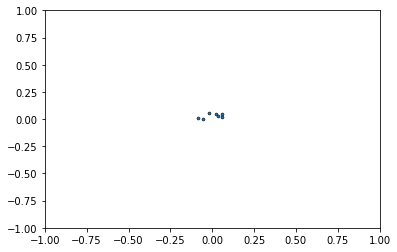

(0.056417257, 0.033816367, 0.02146476, 0.062141776)
(0.056417257, 0.033816367, 0.057091042, 0.059274282)
(0.056417257, 0.033816367, 0.0330699, 0.044275753)
(0.056417257, 0.033816367, 0.048263244, -0.054948106)
(0.056417257, 0.033816367, -0.15845886, 0.06242371)
(0.056417257, 0.033816367, -0.113548465, 0.20713775)
(0.056417257, 0.033816367, -0.13363239, 0.06194791)
(0.056417257, 0.033816367, 0.19944222, 0.16873871)
(0.02146476, 0.062141776, 0.056417257, 0.033816367)
(0.02146476, 0.062141776, 0.057091042, 0.059274282)
(0.02146476, 0.062141776, -0.017960778, 0.06361968)
(0.02146476, 0.062141776, 0.0330699, 0.044275753)
(0.02146476, 0.062141776, 0.048263244, -0.054948106)
(0.02146476, 0.062141776, -0.15845886, 0.06242371)
(0.02146476, 0.062141776, -0.113548465, 0.20713775)
(0.02146476, 0.062141776, -0.13363239, 0.06194791)
(0.02146476, 0.062141776, -0.13412555, 0.20738223)
(0.02146476, 0.062141776, -0.1629603, 0.18954018)
(0.02146476, 0.062141776, 0.19944222, 0.16873871)
(-0.049676895, 0.0

In [5]:
anim = visualizer.animate_organism(graph, model)
IPython.display.HTML(anim.to_jshtml())

In [6]:
graph

Data(x=[100, 5], edge_index=[2, 12], device=cpu, attr=[1], edge_attr=[12, 2])

In [7]:
x = torch.Tensor([1,2])
y = torch.Tensor([-1, -2])
print((x-y).norm())

tensor(4.4721)


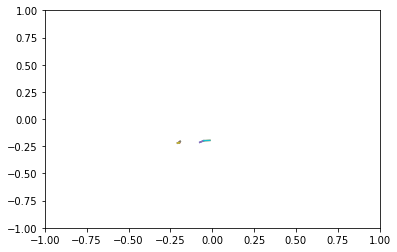

In [15]:
import matplotlib.pyplot as plt
#(-0.05099533, -0.19881648, -0.07439838, -0.21392481)
#(-0.05099533, -0.19881648, -0.013637582, -0.19595696)
#(-0.19133699, -0.20643495, -0.20701185, -0.22094099)
#(-0.19133699, -0.20643495, -0.1959681, -0.21832432)
#(-0.07439838, -0.21392481, -0.05099533, -0.19881648)
#(-0.20701185, -0.22094099, -0.19133699, -0.20643495)
#(-0.20701185, -0.22094099, -0.1959681, -0.21832432)
#(-0.1959681, -0.21832432, -0.19133699, -0.20643495)
#(-0.1959681, -0.21832432, -0.20701185, -0.22094099)
#(-0.013637582, -0.19595696, -0.05099533, -0.19881648)

x = [[-0.05099533, -0.05099533, -0.19133699, -0.1933699, -0.07439838, -0.20701185, -0.20701185, -0.1959681, -0.1959681, -0.013637582],
     [-0.07439838, -0.013637582, -0.20701185, -0.1959681, -0.05099533, -0.19133699, -0.1959681, -0.19133699, -0.20701185, -0.05099533]]
y = [[-0.19881648, -0.19881648, -0.20643495, -0.20643495, -0.21392481, -0.22094099, -0.22094099, -0.21832432, -0.21832432, -0.19595696],
     [-0.21392481, -0.19595696, -0.22094099, -0.21832432, -0.19881648, -0.20643495, -0.21832432, -0.20643495, -0.22094099, -0.19881648]]

plt.ion()
figure = plt.figure()
borders = np.array([-1, -1, 1, 1])
axes = plt.axes(xlim=borders[::2], ylim=borders[1::2])
plot, *_ = axes.plot(x, y)
#plot.set_data(x, y)
plt.show()
